# Hello World Neural Networks


* The idea is to infer/learn the rules from the data in the ML paradigm
* In conventional programming, we input data + rules -> answers
* In ML, we input data + answers -> rules (helps us answer (generalize) questions about other data)

## Imports

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

## Simple Neural Network

In [3]:
# Create the model

model = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=(1,))
], name='simple-one-unit')

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Summarize
model.summary()


Model: "simple-one-unit"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Make some Dummy Data

Assume a linear relationship $y = \beta_0 + \beta_1{X} + \epsilon$

In [22]:
RANDOM_STATE = 42
np.random.seed(seed=42)

X = (np.arange(0, 1000)/100)[:, np.newaxis]
intercept, coeff, std_err = 1, 2, 1
y_true_rel = intercept + coeff*X
y_obs =  y_true_rel + np.random.normal(scale=std_err, size=(1000, 1))


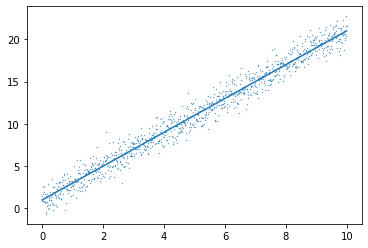

In [24]:
plt.scatter(X, y_obs, s=0.1, label='observed data')
plt.plot(X, y_true_rel, label='true relationship');

## Now fit the model

In [25]:
model.fit(X, y_obs, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 987us/step - loss: 0.9803
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9791
Epoch 3/100
32/32 [==============================] - 0s 940us/step - loss: 0.9809
Epoch 4/100
32/32 [==============================] - 0s 935us/step - loss: 0.9807
Epoch 5/100
32/32 [==============================] - 0s 972us/step - loss: 0.9767
Epoch 6/100
32/32 [==============================] - 0s 952us/step - loss: 0.9702
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9633
Epoch 8/100
32/32 [==============================] - 0s 982us/step - loss: 0.9787
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9608
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9755
Epoch 11/100
32/32 [==============================] - 0s 939us/step - loss: 0.9749
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9720
Epoch 13/100
32/32 [===

In [29]:
true_mse = std_err**2
true_mse

1

In [34]:
y_pred = model.predict(X)
est_mse = ((y_obs - y_pred)**2).sum()/len(y_obs)
est_mse

0.9667167112392282

Pretty close!

## Plot the predictions

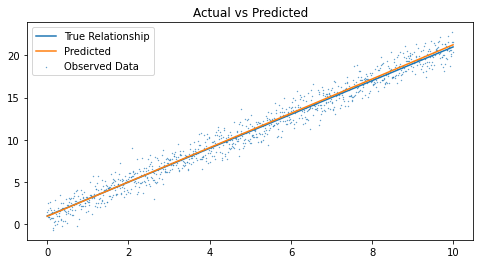

In [39]:
plt.figure(figsize=(8, 4))

plt.scatter(X, y_obs, label='Observed Data', s=0.1)
plt.plot(X, y_true_rel, label='True Relationship')
plt.plot(X, y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted');

Good Job Generalizing!